In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

path = "training_data.csv"
data = pd.read_csv(path)
data = data.sample(frac=1)
#data = data.drop(['Formation','Well Name'], axis = 1)
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
1617,1,B2 SH,CROSS H CATTLE,2694.0,79.301,0.726564,5.100,13.05,3.250,1,0.093
2660,6,B4 LM,NEWBY,2973.5,29.990,0.500000,5.300,7.25,3.500,2,0.154
920,3,A1 SH,LUKE G U,2610.5,74.900,0.782000,9.300,11.75,4.084,1,1.000
2706,9,B5 LM,NEWBY,2996.5,52.960,0.340000,-5.300,17.45,4.600,2,0.302
3091,6,B4 LM,CHURCHMAN BIBLE,3050.0,43.938,0.685000,3.529,7.36,3.852,2,0.214


In [2]:
train_sizes = list(range(160,2560,160))

categorical = ["Well Name", "Formation"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass

In [3]:
def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean

In [4]:
from sklearn.model_selection import learning_curve
from sklearn import tree
#features = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M','RELPOS']
target = 'Facies'
features = [feature for feature in list(data.head(0)) if feature != target]

tree_trainsize, tree_trainscore, tree_validscore = tv_scores_mean(estimator = tree.DecisionTreeClassifier(max_depth=10), 
                                                                    X=data[features], y=data[target], train_sizes=train_sizes)


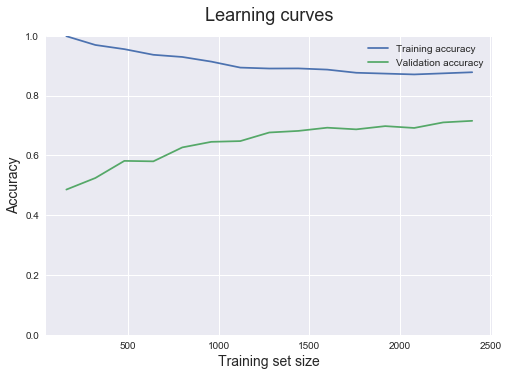

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')


def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

plot_learning_curve(tree_trainsize, tree_trainscore, tree_validscore)

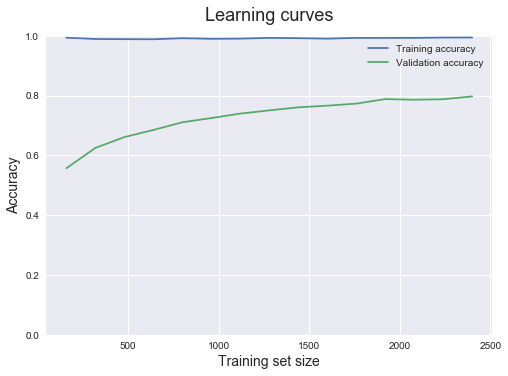

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc_est = RandomForestClassifier()

plot_learning_curve(*tv_scores_mean(rfc_est,X,y,train_sizes))

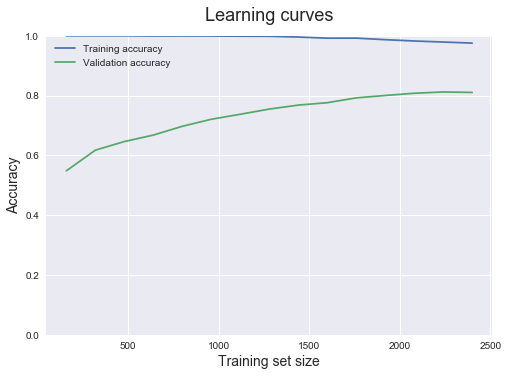

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


X=data[features]
y=data[target]

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)


mlp_est = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,30), random_state=1)


plot_learning_curve(*tv_scores_mean(mlp_est,X,y,train_sizes))

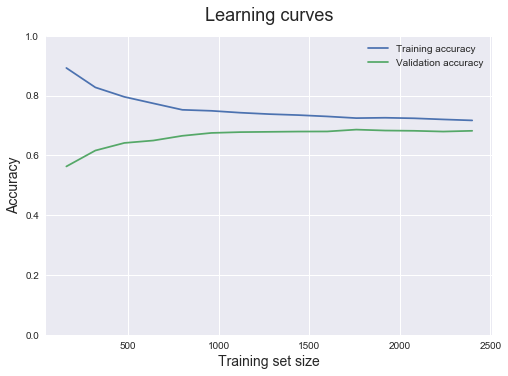

In [10]:
from sklearn import svm

svm_est = svm.SVC(kernel='linear', C=1, gamma=1)

plot_learning_curve(*tv_scores_mean(svm_est,X,y,train_sizes))